In [1]:
#importing required packages
import numpy as np
import pandas as pd 
import seaborn as sns
pd.options.display.float_format='{:.2f}'.format
import math 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick 
from scipy.stats import norm, skew 
from scipy import stats

In [2]:
#reading the csv file and the first 5 rows of the dataset
telecom_cust = pd.read_csv("C:/Users/19804/DIC_project/DIC_dataset.csv") 
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#The info() tells about the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Dropping customer ID as it only has unique values hence cannot be used in classification
telecom_cust.drop(columns = ['customerID'], inplace = True)
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
#Conversion of the TotalCharges from string to float
l1 = [len(i.split()) for i in telecom_cust['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
for i in l2:
    telecom_cust.loc[i,'TotalCharges'] = telecom_cust.loc[(i-1),'TotalCharges']    
telecom_cust['TotalCharges'] = telecom_cust['TotalCharges'].astype(float)
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
#label encoding on text data to convcert all the object features into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = telecom_cust.copy(deep=True)


data_features = [i for i in list(telecom_cust.columns) if i not in list(telecom_cust.describe().columns)]
for i in data_features :
    df[i] = le.fit_transform(df[i])

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


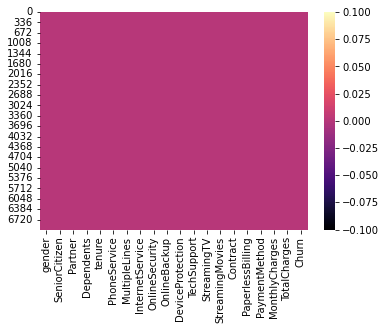

In [9]:
#heatmap to check the missing values
sns.heatmap(df.isnull(),cmap = 'magma');

In [10]:
df.describe() #as the name suggests it does the description and mathematical analysis of each column

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.50,0.16,0.48,0.30,32.37,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2285.17,0.27
std,0.50,0.37,0.50,0.46,24.56,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2267.54,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,401.68,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1398.25,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3803.05,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


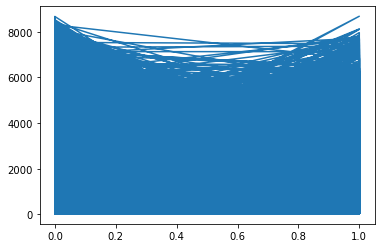

In [11]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
#sns.pairplot(df)
plt.plot( df['Churn'],df['TotalCharges'])
#pyplot.show()


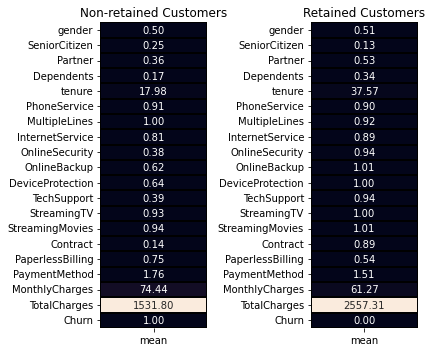

In [12]:
churn=df[df['Churn']==1].describe().T
not_churn=df[df['Churn']==0].describe().T
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(6,5))
#to plot the mean values of Retained customer features
plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot=True,linewidths=0.4,linecolor='black',cbar=False,fmt='.2f')
plt.title('Retained Customers');
#to plot the mean values of Non-retained customer features
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot=True,linewidths=0.4,linecolor='black',cbar=False,fmt='.2f')
plt.title('Non-retained Customers');
fig.tight_layout()

In [13]:
#Dividing features into Numerical and Categorical for better visualisation purposes
col=list(df.columns)
categorical_features=[]
numerical_features=[]
for i in col:
    if len(telecom_cust[i].unique())>6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)    

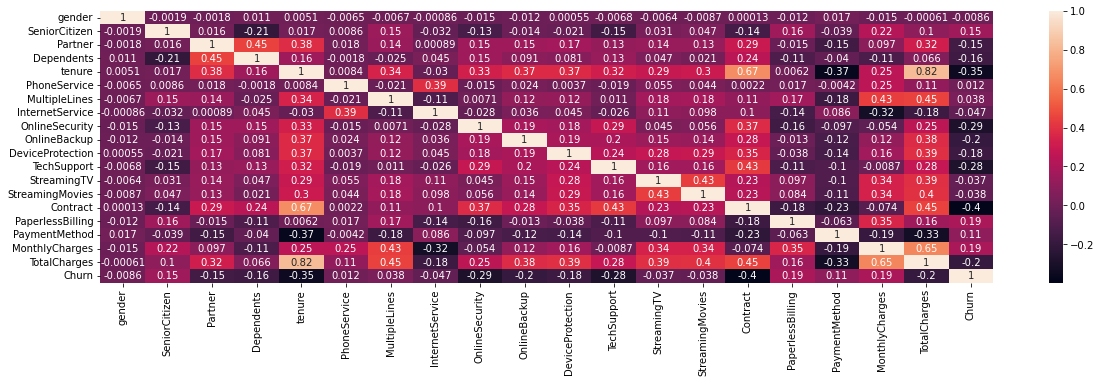

In [14]:
#plotting Correlation Matrix with all the features using heat map
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(),annot = True);

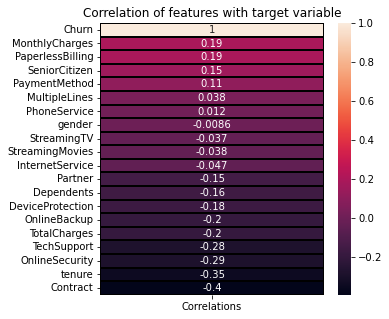

In [15]:
#performing correlation of features with target variable instead of all against all like earlier
corr=df.corrwith(df['Churn']).sort_values(ascending=False).to_frame()
corr.columns=['Correlations']
plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,linewidths=0.3,linecolor='black');#plotting the heat map
plt.title('Correlation of features with target variable');#the plotted map title

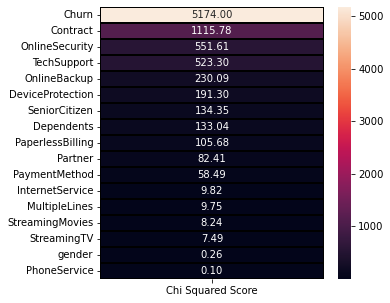

In [16]:
#for selecting the best features we are performing on the categorical features(Chi squared test)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
features=df.loc[:,categorical_features]
# we set the target variable for comparison
target=df.loc[:,'Churn']
best_features=SelectKBest(score_func=chi2,k='all')#selection
fit=best_features.fit(features,target)
featureScores=pd.DataFrame(data=fit.scores_,index=list(features.columns),columns=['Chi Squared Score']) 
plt.subplots(figsize=(5,5))#plots the graph along with the score
sns.heatmap(featureScores.sort_values(ascending=False,by='Chi Squared Score'),annot=True,linewidths=0.4,linecolor='black',fmt='.2f');

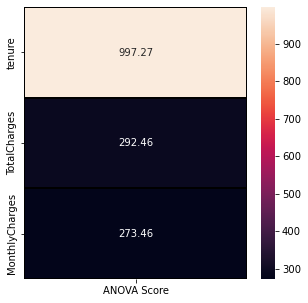

In [17]:
#for selecting the best features we are performing on the numerical features(Anova)
from sklearn.feature_selection import f_classif
features=df.loc[:,numerical_features]
target=df.loc[:,'Churn']#setting the target variable for comparision
best_features=SelectKBest(score_func=f_classif,k='all')#selection
fit=best_features.fit(features,target)
featureScores=pd.DataFrame(data=fit.scores_,index=list(features.columns),columns=['ANOVA Score']) 
plt.subplots(figsize=(5,5))#plots the graph along with the score
sns.heatmap(featureScores.sort_values(ascending=False,by='ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');

In [18]:
#dropping the non important variables
df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int32  
 2   Dependents        7043 non-null   int32  
 3   tenure            7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int32  
 5   OnlineBackup      7043 non-null   int32  
 6   DeviceProtection  7043 non-null   int32  
 7   TechSupport       7043 non-null   int32  
 8   Contract          7043 non-null   int32  
 9   PaperlessBilling  7043 non-null   int32  
 10  PaymentMethod     7043 non-null   int32  
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7043 non-null   float64
 13  Churn             7043 non-null   int32  
dtypes: float64(2), int32(10), int64(2)
memory usage: 495.3 KB


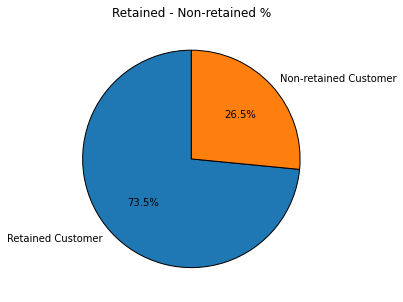

In [19]:
#Target variable - Churn Visualization by plotting a pie chart 
l=list(df['Churn'].value_counts())# list to hold all the tuple values of the churn column
circle=[l[0]/sum(l)*100,l[1]/sum(l)*100]
fig=plt.subplots(nrows=1,ncols=1,figsize=(20,5))# placement of the graph coordinates in the output
plt.subplot(1,2,1)
plt.pie(circle,labels=['Retained Customer','Non-retained Customer'],autopct='%1.1f%%',startangle=90,
       wedgeprops = {'linewidth': 1,'edgecolor' : 'black','antialiased' : True})# commands to obtain the desired comparison of the target variable 
plt.title('Retained - Non-retained %');#title of the chart

<AxesSubplot:>

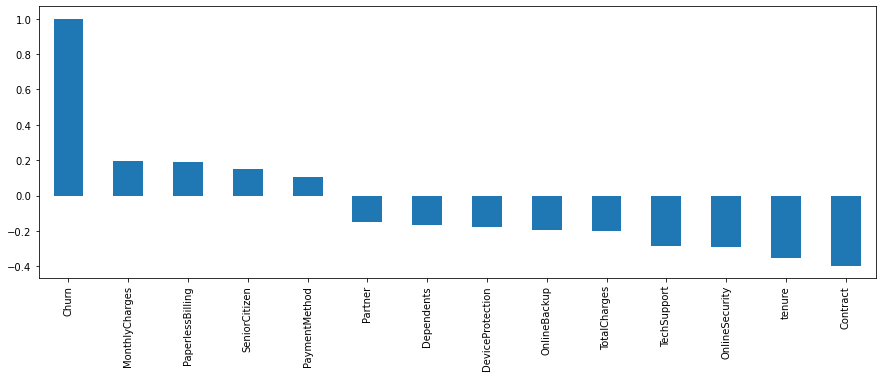

In [20]:
#Plotting bar graph to view the features after removing the unnecessary variables.
plt.figure(figsize=(15,5))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [21]:
#removing churn for visualisation purposes
categorical_features.remove('Churn')

In [22]:
# breaking the features into groups
# Customer Information
l1=['SeniorCitizen','Partner','Dependents']
# Services Signed Up for!
l2=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] 
# Payment Information
l3=['Contract','PaperlessBilling','PaymentMethod'] 

C:\Users\19804\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\19804\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\19804\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


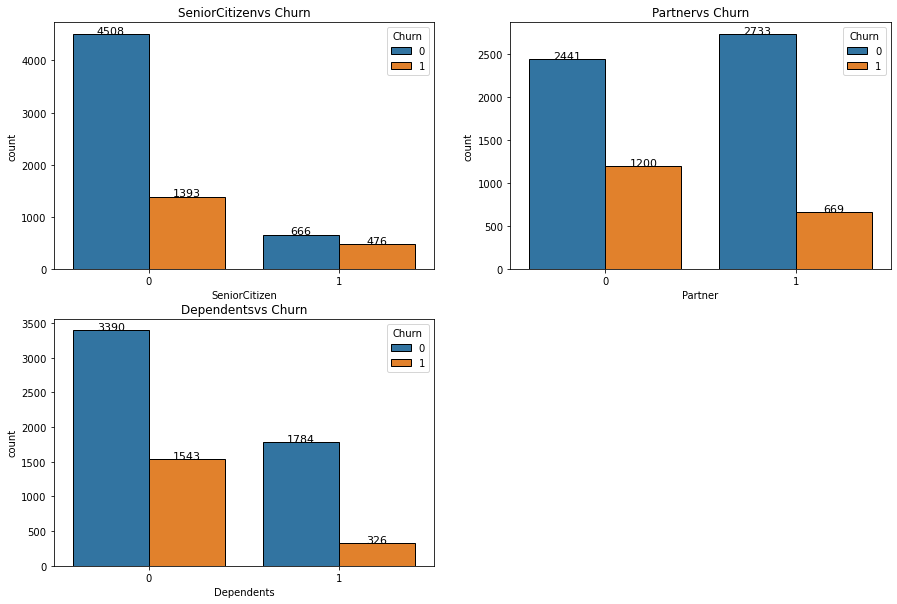

In [23]:
# plotting histograms of Customer Information vs target variable
fig=plt.subplots(nrows=1,ncols=1,figsize=(15,10))# placement of the graph coordinates in the output
for i in range(len(l1)):
    plt.subplot(2,2,i+1) #runs on loop for each each feature
    ax=sns.countplot(l1[i],data=df,hue="Churn",edgecolor='black')#specifies each histogram and their description from the dataset
    for rect in ax.patches:
        ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
    title=l1[i]+'vs Churn'
    plt.title(title);

C:\Users\19804\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\19804\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\19804\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\19804\anaconda3\lib\si

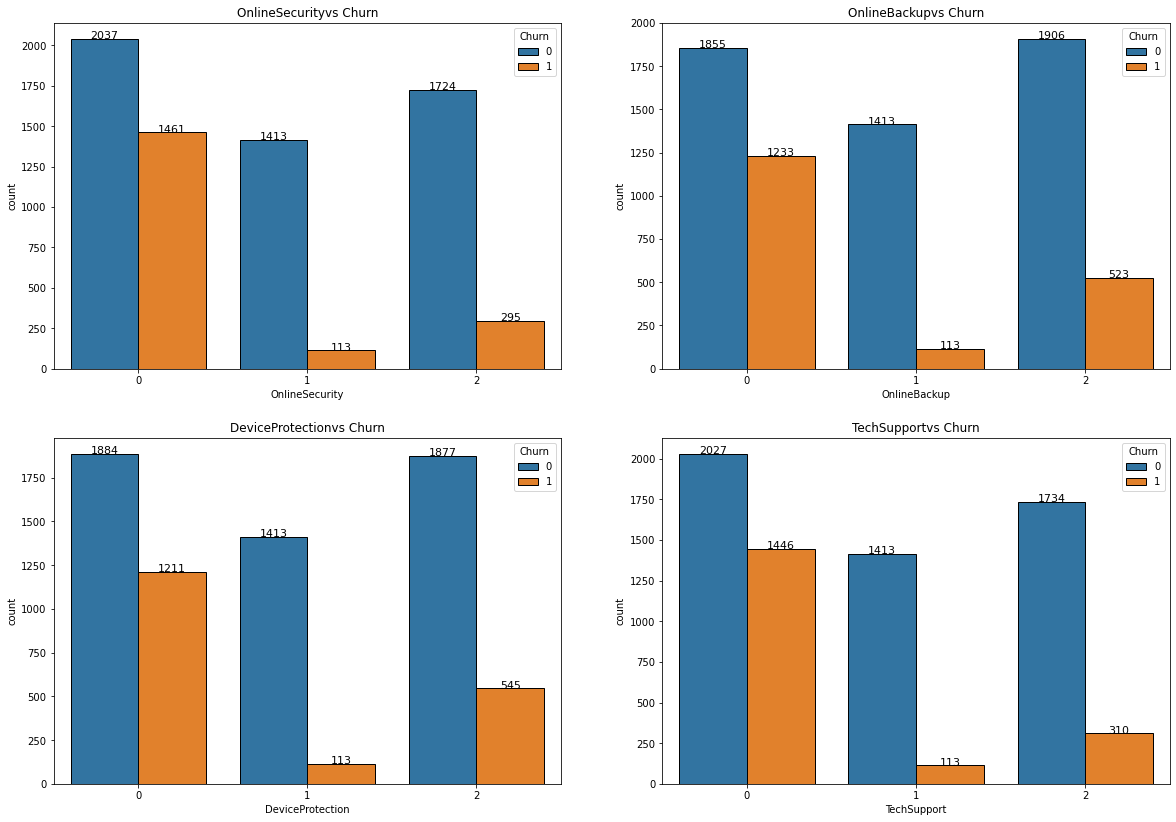

In [24]:
#Histogram of Services Subscribed by the Customer vs the Target variable
fig=plt.subplots(nrows=2,ncols=2,figsize=(20,14))#placement of the graph coordinates in the output
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i+1)#runs on loop for each each feature
    ax=sns.countplot(l2[-4+i],data=df,hue="Churn",edgecolor='black')#specifies each histogram and their description from the dataset
    for rect in ax.patches:
        ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
    title=l2[-4+i]+ 'vs Churn'#listing the name of each feature
    plt.title(title);

C:\Users\19804\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\19804\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\19804\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


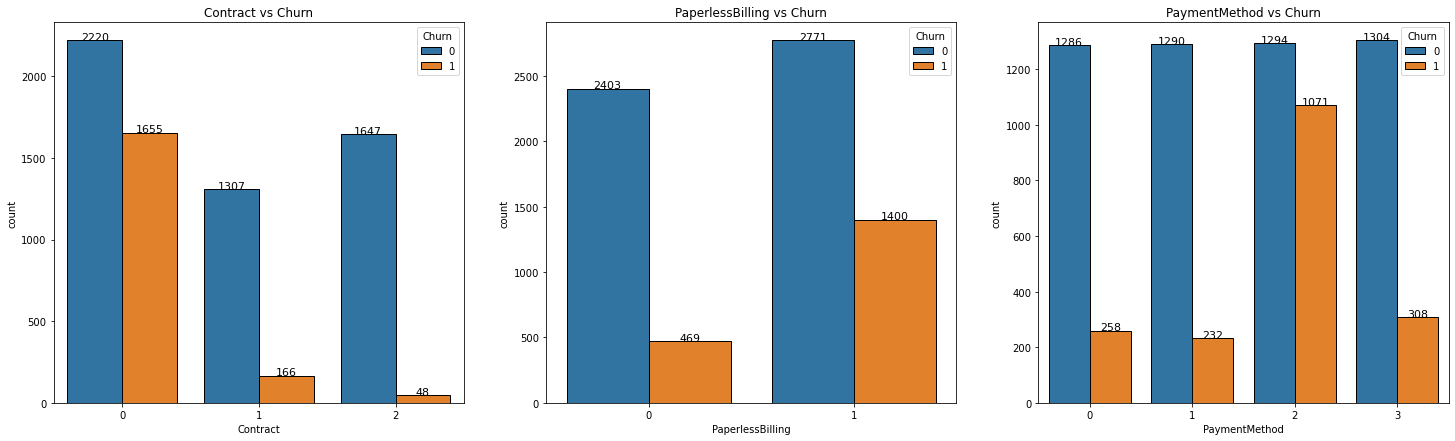

In [25]:
#Histogram of Payment Information of the Customer vs the Target variable
fig=plt.subplots(nrows=1,ncols=3,figsize=(25,7))#placement of the graph coordinates in the output
plt.subplot(1,3,1)#contract feature
ax=sns.countplot(l3[0],data=df,hue="Churn",edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
title=l3[0]+' vs Churn'
plt.title(title);
plt.subplot(1,3,2)#paperless billing feature
ax=sns.countplot(l3[1],data=df,hue="Churn",edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
title=l3[1]+' vs Churn'
plt.title(title);
plt.subplot(1,3,3)#payment method feature
ax=sns.countplot(l3[2],data=df,hue="Churn",edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
title=l3[2]+' vs Churn'
plt.title(title);

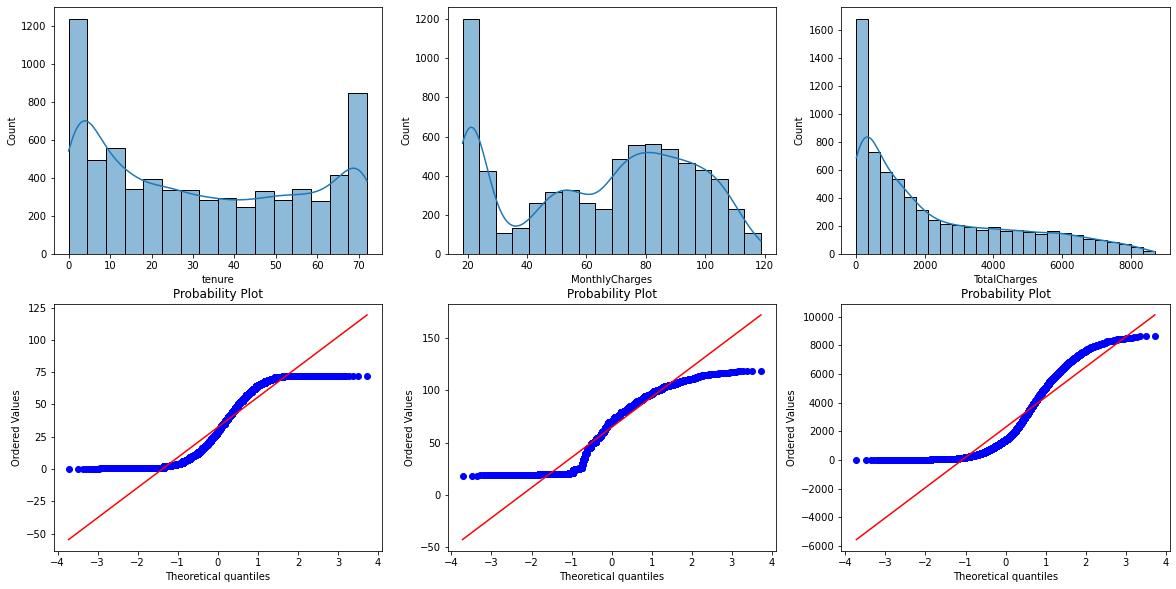

In [26]:
#Analyzing the Numerical Variables(Tenure, Monthly Charges, Total Charges) with respect to churn
plot,ax=plt.subplots(2,3,figsize=(20,10))
#plotting histogram and distributions of each numerical feature wrt churn
g=sns.histplot(df['tenure'],kde=True,ax=ax[0][0])
res=stats.probplot(df['tenure'],plot=ax[1][0])
g=sns.histplot(df['MonthlyCharges'],kde=True,ax=ax[0][1])
res=stats.probplot(df['MonthlyCharges'],plot=ax[1][1])
g=sns.histplot(df['TotalCharges'],kde=True,ax=ax[0][2])
res=stats.probplot(df['TotalCharges'],plot=ax[1][2])

<AxesSubplot:>

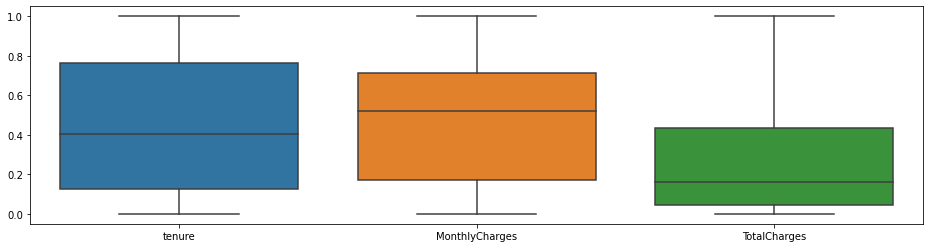

In [27]:
#Performing normalisation of each numerical feature
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization

df['tenure']=mms.fit_transform(df[['tenure']])
df['MonthlyCharges']=mms.fit_transform(df[['MonthlyCharges']])
df['TotalCharges']=mms.fit_transform(df[['TotalCharges']])
# outlier detection using box plots
plt.figure(figsize=(16,4))
sns.boxplot(data=df[['tenure','MonthlyCharges','TotalCharges']])

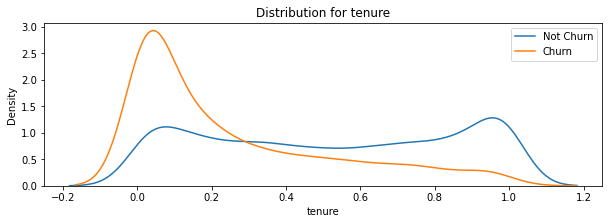

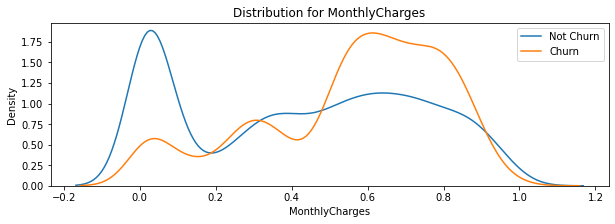

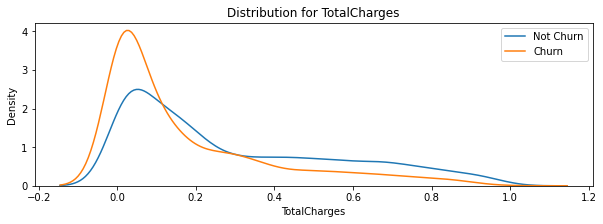

In [28]:
#Visualizing against Churn
def plot(feature):#defining a method to plot the distribution graph of the numerical features against churn
    plt.figure(figsize=(10, 3))
    plt.title("Distribution for {}".format(feature))
    ax0=sns.kdeplot(df[df['Churn']==0][feature].dropna(),label='Churn: No')
    ax1=sns.kdeplot(df[df['Churn']==1][feature].dropna(),label='Churn: Yes')
    ax0.legend(["Not Churn","Churn"],loc='upper right')
plot('tenure')
plot('MonthlyCharges')
plot('TotalCharges')

In [29]:
#Visualization of Numerical Features w.r.t Target Variable (Churn)

fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(15,15))#the coordinates at which the plots need to be placed in the output
for i in range(len(numerical_features)):# loop to run each of teh three numerical features
    plt.subplot(3,1,i+1)
    sns.countplot(numerical_features[i],data=df,hue="Churn",edgecolor='black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title=numerical_features[i]+' w.r.t Churn'
    plt.title(title);

C:\Users\19804\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\19804\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\19804\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Error in callback <function flush_figures at 0x0000025F6C7AF700> (for post_execute):


KeyboardInterrupt: 

In [30]:
# for Q-Q plot
#import scipy.stats as stats

In [31]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.01,0,2,0,0,0,1,2,0.12,0.00,0
1,0,0,0,0.47,2,0,2,0,1,0,3,0.39,0.22,0
2,0,0,0,0.03,2,2,0,0,0,1,3,0.35,0.01,1
3,0,0,0,0.62,2,0,2,2,1,0,0,0.24,0.21,0
4,0,0,0,0.03,0,0,0,0,0,1,2,0.52,0.02,1


In [32]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over=SMOTE(sampling_strategy=1)
f1=df.iloc[:,:13].values
t1=df.iloc[:,13].values
f1,t1=over.fit_resample(f1,t1)
Counter(t1)

Counter({0: 5174, 1: 5174})

In [33]:
#Modelling phase starts here

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [35]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1),
                                                   df['Churn'],
                                                   test_size=0.2,
                                                   random_state=0)

x_train.shape, x_test.shape

((5634, 13), (1409, 13))

In [36]:
x_train_original = x_train.copy()
x_test_original = x_test.copy()

In [37]:
# let's check if we have constant/quasi-constants or correlated features
!pip install feature_engine
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, SmartCorrelatedSelection
constats = DropConstantFeatures(variables=None,  #because I want all type of variables to be included
                                tol=0.998, #it will filter out both constants and quasi-constants
                                missing_values='ignore') #incase there are any

constats.fit(x_train)

DropConstantFeatures(missing_values='ignore', tol=0.998)

In [38]:
correlated_features = SmartCorrelatedSelection(variables=None,
                                              method='pearson',
                                              threshold=0.8,
                                              missing_values='ignore',
                                              selection_method='variance',
                                              estimator=None,
                                              scoring='roc_auc',
                                              cv=3)

correlated_features.fit(x_train)

SmartCorrelatedSelection(selection_method='variance')

In [39]:
# let's check for types of variables
# numerical variables: Discrete variable & continuous variable

discrete_variables = [var for var in x_train.columns if x_train[var].dtypes != 'O' and x_train[var].nunique() < 20 and var != 'customerID']
continuous_variables = [var for var in x_train.columns if x_train[var].dtypes != 'O' and var not in discrete_variables]

# categorical variables
categorical_variables = [var for var in x_train.columns if x_train[var].dtypes == 'O' and var != 'customerID']


In [40]:
# replacing null values with random sample

from feature_engine.imputation import RandomSampleImputer
cols_to_use = ['tenure','MonthlyCharges','TotalCharges']
impute = RandomSampleImputer(variables=cols_to_use)

impute.fit(x_train)

RandomSampleImputer(variables=['tenure', 'MonthlyCharges', 'TotalCharges'])

In [41]:
x_train = impute.transform(x_train)
x_test = impute.transform(x_test)

In [42]:
categorical_variables.append('SeniorCitizen')
categorical_variables

['SeniorCitizen']

In [43]:
# I will treat discreate variable as categorical variable so later I can encode 

x_train[discrete_variables] = x_train[discrete_variables].astype('O')
x_test[discrete_variables] = x_test[discrete_variables].astype('O')

In [44]:
for var in categorical_variables:
    print(x_train.groupby([var])[var].count()/len(x_train))

SeniorCitizen
0   0.84
1   0.16
Name: SeniorCitizen, dtype: float64


In [45]:
y_train.replace(to_replace=['Yes','No'],value=[1,0], inplace=True)
y_test.replace(to_replace=['Yes','No'], value=[1,0], inplace=True)

In [46]:
# I will use count encoder to encode categoris 
from feature_engine.encoding import MeanEncoder

In [47]:
cat_encoder = MeanEncoder(variables=categorical_variables)

cat_encoder.fit(x_train, y_train)

MeanEncoder(variables=['SeniorCitizen'])

In [48]:
cat_encoder.encoder_dict_

{'SeniorCitizen': {0: 0.23702605380216055, 1: 0.4184008762322015}}

In [49]:
x_train = cat_encoder.transform(x_train)
x_test = cat_encoder.transform(x_test)

In [50]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [51]:
disc = EqualFrequencyDiscretiser(variables=continuous_variables, q=10, return_object=True)

disc.fit(x_train)

x_train = disc.transform(x_train)
x_test = disc.transform(x_test)

In [52]:
# I will use the same encoder I used for categorical encoding

var_encoder = MeanEncoder(variables=continuous_variables)

var_encoder.fit(x_train,y_train)

x_train = var_encoder.transform(x_train)
x_test = var_encoder.transform(x_test)

In [53]:
cols = x_train.columns

In [54]:
from sklearn.preprocessing import RobustScaler

In [55]:
scaler = RobustScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
x_train = pd.DataFrame(x_train, columns=cols)
x_test = pd.DataFrame(x_test, columns=cols)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SequentialFeatureSelector

In [58]:
selector = SequentialFeatureSelector(estimator=LogisticRegression(random_state=0),
                                    n_features_to_select=6,
                                    direction='forward',
                                    scoring='roc_auc',
                                    cv=5)

selector.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=0),
                          n_features_to_select=6, scoring='roc_auc')

In [59]:
selector.get_feature_names_out()

array(['SeniorCitizen', 'tenure', 'OnlineSecurity', 'Contract',
       'PaperlessBilling', 'MonthlyCharges'], dtype=object)

In [60]:
x_train = selector.transform(x_train)
x_test = selector.transform(x_test)

In [61]:
log_reg = LogisticRegression(random_state=0)

log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.50      0.55       368

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



0.78708303761533


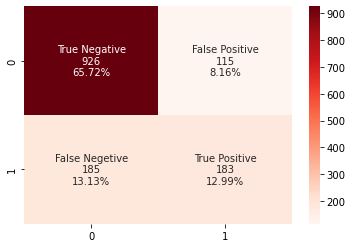

In [62]:
cm = confusion_matrix(y_test,y_pred)
names = ['True Negative','False Positive','False Negetive','True Positive']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Reds',fmt ='')

print(classification_report(y_test,y_pred))
print('\n')
print(accuracy_score(y_test,y_pred))

In [63]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [64]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print('\n')
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    print('\n')
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Negatve','False Positive','False Negative','True Positive']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Reds',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))
    print('\n')
    print(accuracy_score(y_test,classifier.predict(x_test)))

In [65]:
! pip install xgboost
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)



Cross Validation Score :  90.16%
ROC_AUC Score :  82.34%




C:\Users\19804\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


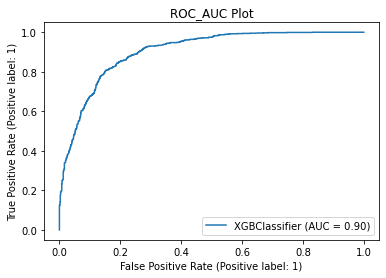

In [66]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1040
           1       0.80      0.86      0.83      1030

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



0.8231884057971014


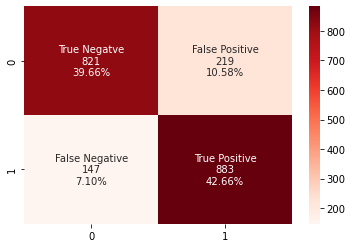

In [67]:
model_evaluation(classifier_xgb,x_test,y_test)

In [68]:
!pip install lightgbm
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)



Cross Validation Score :  90.29%
ROC_AUC Score :  83.01%




C:\Users\19804\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


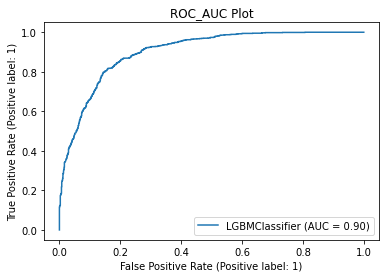

In [69]:
model(classifier_lgbm,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1040
           1       0.81      0.86      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



0.8299516908212561


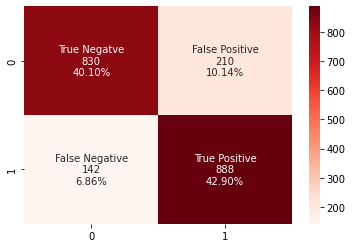

In [70]:
model_evaluation(classifier_lgbm,x_test,y_test)

In [71]:
#!pip install sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)



Cross Validation Score :  85.54%
ROC_AUC Score :  78.77%




C:\Users\19804\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


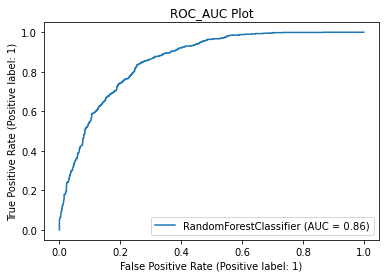

In [72]:
model(classifier_rf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.83      0.73      0.77      1040
           1       0.75      0.85      0.80      1030

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



0.7874396135265701


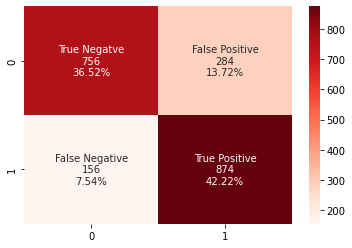

In [73]:
model_evaluation(classifier_rf,x_test,y_test)

In [74]:

from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)



Cross Validation Score :  84.31%
ROC_AUC Score :  76.57%




C:\Users\19804\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


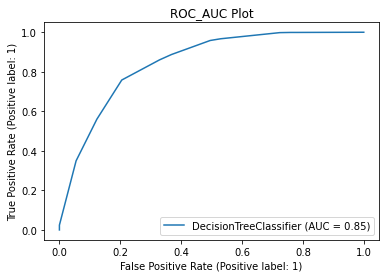

In [75]:
model(classifier_dt,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.83      0.67      0.74      1040
           1       0.72      0.86      0.78      1030

    accuracy                           0.77      2070
   macro avg       0.78      0.77      0.76      2070
weighted avg       0.78      0.77      0.76      2070



0.7652173913043478


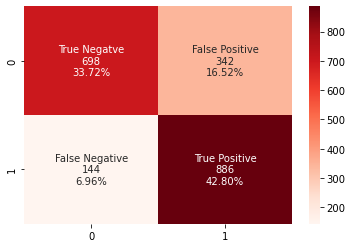

In [76]:
model_evaluation(classifier_dt,x_test,y_test)

[Text(0.49107142857142855, 0.9, 'X[8] <= 0.988\ngini = 0.5\nsamples = 8278\nvalue = [4134, 4144]'),
 Text(0.26785714285714285, 0.7, 'X[4] <= 0.5\ngini = 0.435\nsamples = 5536\nvalue = [1770, 3766]'),
 Text(0.14285714285714285, 0.5, 'X[3] <= 0.236\ngini = 0.379\nsamples = 4078\nvalue = [1034, 3044]'),
 Text(0.07142857142857142, 0.3, 'X[11] <= 0.518\ngini = 0.3\nsamples = 2658\nvalue = [489, 2169]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.403\nsamples = 1067\nvalue = [298, 769]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.211\nsamples = 1591\nvalue = [191, 1400]'),
 Text(0.21428571428571427, 0.3, 'X[11] <= 0.514\ngini = 0.473\nsamples = 1420\nvalue = [545, 875]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.459\nsamples = 264\nvalue = [170, 94]'),
 Text(0.25, 0.1, 'gini = 0.438\nsamples = 1156\nvalue = [375, 781]'),
 Text(0.39285714285714285, 0.5, 'X[8] <= 0.002\ngini = 0.5\nsamples = 1458\nvalue = [736, 722]'),
 Text(0.35714285714285715, 0.3, 'X[3] <= 0.319\ngini = 0.499\nsamples = 140

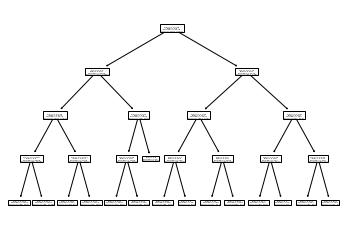

In [77]:
from sklearn import tree
class_xg=classifier_dt
tree.plot_tree(classifier_dt)

In [78]:
import pickle

In [79]:
x_test.shape

(2070, 13)

In [80]:
x_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.86069652,
        0.75210016],
       [0.        , 0.        , 0.        , ..., 3.        , 0.22189055,
        0.15832564],
       [0.        , 0.07806199, 0.        , ..., 2.07806199, 0.83640144,
        0.70459977],
       ...,
       [0.        , 1.        , 0.        , ..., 2.        , 0.85472637,
        0.6605412 ],
       [0.        , 0.        , 0.        , ..., 3.        , 0.01940299,
        0.01209901],
       [0.        , 0.1463155 , 0.        , ..., 2.        , 0.77446817,
        0.42500404]])

In [81]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.01,0,2,0,0,0,1,2,0.12,0.00,0
1,0,0,0,0.47,2,0,2,0,1,0,3,0.39,0.22,0
2,0,0,0,0.03,2,2,0,0,0,1,3,0.35,0.01,1
3,0,0,0,0.62,2,0,2,2,1,0,0,0.24,0.21,0
4,0,0,0,0.03,0,0,0,0,0,1,2,0.52,0.02,1


In [82]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#le_gender=LabelEncoder()
le_partner = LabelEncoder()
le_dependents = LabelEncoder()
le_onlinesecurity = LabelEncoder()
le_onlinebackup = LabelEncoder()
le_deviceprotection = LabelEncoder()
le_techsupport = LabelEncoder()
le_contract = LabelEncoder()
le_paperbilling = LabelEncoder()
le_paymentmethod = LabelEncoder()
le_partner.fit(["No","Yes"])
le_dependents.fit(["No","Yes"])
le_onlinesecurity.fit(["No","Yes","No internet service"])
le_onlinebackup.fit(["No","Yes","No internet service"])
le_deviceprotection.fit(["No","Yes","No internet service"])
le_techsupport.fit(["No","Yes","No internet service"])
le_contract.fit(["Month-to-month", "One year", "Two year"])
le_paperbilling.fit(["No","Yes"])
le_paymentmethod.fit(["Electronic check","Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"])




mms_tenure=MinMaxScaler()
mms_monthly_charges=MinMaxScaler()
mms_total_charges=MinMaxScaler()
tenure_min=0
tenure_max=72
month_min=18.25
month_max=118.75
tot_min=18.8
tot_max=8684.80
#X1 = np.array([[0,"Yes","No",1,"No","Yes","No","No","Month-to-month","Yes","Electronic check",29.85,29.85 ]])
X1=np.array([[0,"No","No",2,"Yes","Yes","No","No","Month-to-month","Yes","Mailed check",53.85,108.15]])
#X=np.array([[0,"Yes","No",28,"No","No","Yes","Yes","Month-to-month","Yes","Electronic check",104.8,3046.05]])
X1[:, 1] = le_partner.transform(X1[:,1])
X1[:, 2] = le_dependents.transform(X1[:,2])
X1[:, 3] =np.round_(((float(X1[:,3])-tenure_min)/(tenure_max-tenure_min)),decimals=2)
X1[:, 4] = le_onlinesecurity.transform(X1[:,4])
X1[:, 5] = le_onlinebackup.transform(X1[:,5])
X1[:, 6] = le_deviceprotection.transform(X1[:,6])
X1[:, 7] = le_techsupport.transform(X1[:,7])
X1[:, 8] = le_contract.transform(X1[:,8])
X1[:, 9] = le_paperbilling.transform(X1[:,9])
X1[:, 10] = le_paymentmethod.transform(X1[:,10])
X1[:, 11] =np.round_( ((float(X1[:,11])-month_min)/(month_max-month_min)),decimals=2)

X1[:, 12] = np.round_(((float(X1[:,12])-tot_min)/(tot_max-tot_min)),decimals=2)




X1 = X1.astype(float)
print(X1[:])


[[0.   0.   0.   0.03 2.   2.   0.   0.   0.   1.   3.   0.35 0.01]]


In [83]:
data = {"model":class_xg ,"le_partner":le_partner,"le_dependents":le_dependents,"le_onlinesecurity":le_onlinesecurity,"le_onlinebackup":le_onlinebackup,"le_deviceprotection":le_deviceprotection,"le_techsupport":le_techsupport,"le_contract":le_contract,"le_paperbilling":le_paperbilling,"le_paymentmethod":le_paymentmethod}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

class_loaded = data["model"]
le_partner=data["le_partner"]
le_dependents = data["le_dependents"]
#le_tenure=data["le_tenure"]
le_onlinesecurity = data["le_onlinesecurity"]
le_onlinebackup = data["le_onlinebackup"]
le_deviceprotection = data["le_deviceprotection"]
le_techsupport = data["le_techsupport"]
le_contract = data["le_contract"]
le_paperbilling = data["le_paperbilling"]
le_paymentmethod = data["le_paymentmethod"]
#le_monthly_charges= data["le_monthly_charges"]
#le_total_charges=data["le_total_charges"]